In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import nltk
import sys

In [2]:
df1 = pd.read_csv('data/tweetset.csv', encoding="windows-1254")
df1.head()

,Tip,Paylaşım,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Negatif,Doğa ağzımıza sıçsa hakkı var,NaN,NaN,NaN,NaN
1,Pozitif,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",NaN,NaN,NaN,NaN
2,Negatif,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,NaN,NaN,NaN,NaN
3,Negatif,Köpeğim suratına sıçsın senin namussuz karı,NaN,NaN,NaN,NaN
4,Negatif,"Ben söğüşledim, birazda sen söğüşle",NaN,NaN,NaN,NaN


In [3]:
df1.shape

(11111, 6)

In [4]:
df2 = pd.read_csv('data/TurkishTweets.csv')
df2.head()

,Tweet,Etiket
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın


# Prepare & Concatenate Datasets

In [5]:
df2.shape

(4000, 2)

In [6]:
df1.isnull().sum()

Tip               0
Paylaşım          0
Unnamed: 2    11109
Unnamed: 3    11111
Unnamed: 4    11110
Unnamed: 5    11110
dtype: int64

### Drop the unnecessary columns in 1. dataset

In [7]:
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis = 1)
df1.isnull().sum()

Tip         0
Paylaşım    0
dtype: int64

In [8]:
df1.shape

(11111, 2)

In [9]:
df2.isnull().sum()

Tweet     1
Etiket    0
dtype: int64

In [10]:
df2 = df2.dropna()
df2.isnull().sum()

Tweet     0
Etiket    0
dtype: int64

### Change labels in datasets

In [11]:
df2['Etiket'].unique()

array(['kızgın', 'korku', 'mutlu', 'surpriz', 'üzgün'], dtype=object)

In [12]:
df2["Etiket"].replace({"kızgın": "Negative", "korku": "Negative", "mutlu": "Positive", 
                        "surpriz": "Positive", "üzgün": "Negative"}, inplace=True)
df2['Etiket'].unique()

array(['Negative', 'Positive'], dtype=object)

In [13]:
df2.columns = ['Tweets', 'Sentiment']
df2.head(5)

,Tweets,Sentiment
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,Negative
1,site ne zaman çalıştıda ürün stokları bitti di...,Negative
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,Negative
3,Black friday ne amk bu yıl çıkardınız bu bokud...,Negative
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,Negative


In [14]:
df1["Tip"].replace({"Pozitif": "Positive", " Negatif": "Negative", "Negatif": "Negative" }, inplace=True)
df1['Tip'].unique()

array(['Negative', 'Positive'], dtype=object)

In [15]:
df1.isnull().sum()
df1.head(5)

,Tip,Paylaşım
0,Negative,Doğa ağzımıza sıçsa hakkı var
1,Positive,"Anne bir sanatçıdır, en güzel eseri de yavrusu..."
2,Negative,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım
3,Negative,Köpeğim suratına sıçsın senin namussuz karı
4,Negative,"Ben söğüşledim, birazda sen söğüşle"


In [16]:
df1 = df1.reindex(columns=['Paylaşım','Tip'])
df1.head()

,Paylaşım,Tip
0,Doğa ağzımıza sıçsa hakkı var,Negative
1,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",Positive
2,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,Negative
3,Köpeğim suratına sıçsın senin namussuz karı,Negative
4,"Ben söğüşledim, birazda sen söğüşle",Negative


In [17]:
df1.columns = ['Tweets', 'Sentiment']
df1.head(5)

,Tweets,Sentiment
0,Doğa ağzımıza sıçsa hakkı var,Negative
1,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",Positive
2,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,Negative
3,Köpeğim suratına sıçsın senin namussuz karı,Negative
4,"Ben söğüşledim, birazda sen söğüşle",Negative


### Concatenate datasets

In [18]:
df = df1.append(df2, ignore_index=True)
df.head(5)

,Tweets,Sentiment
0,Doğa ağzımıza sıçsa hakkı var,Negative
1,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",Positive
2,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,Negative
3,Köpeğim suratına sıçsın senin namussuz karı,Negative
4,"Ben söğüşledim, birazda sen söğüşle",Negative


In [19]:
df.shape

(15110, 2)

# Text Preprocessing

In [20]:
import re

### Convert to lower case

In [21]:
df['Tweets'] = [token.lower() for token in df['Tweets']]
df.head(5)

,Tweets,Sentiment
0,doğa ağzımıza sıçsa hakkı var,Negative
1,"anne bir sanatçıdır, en güzel eseri de yavrusu...",Positive
2,ibrahimin oğlunu koruyan tanrı’ya da ben sokayım,Negative
3,köpeğim suratına sıçsın senin namussuz karı,Negative
4,"ben söğüşledim, birazda sen söğüşle",Negative


### Remove @ mentions and hyperlinks

In [22]:
found = df[df['Tweets'].str.contains('@')]
found.count()

Tweets       2
Sentiment    2
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweets     15110 non-null  object
 1   Sentiment  15110 non-null  object
dtypes: object(2)
memory usage: 236.2+ KB


In [24]:
df['Tweets'] = df['Tweets'].replace('@[A-Za-z0-9]+', '', regex=True).replace('@[A-Za-z0-9]+', '', regex=True)
found = df[df['Tweets'].str.contains('@')]
found.count()

Tweets       0
Sentiment    0
dtype: int64

In [25]:
found = df[df['Tweets'].str.contains('http')]
found.count()

Tweets       13
Sentiment    13
dtype: int64

In [26]:
df['Tweets'] = df['Tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
found = df[df['Tweets'].str.contains('http')]
found.count()

Tweets       0
Sentiment    0
dtype: int64

In [27]:
df.shape

(15110, 2)

### Remove Punctations & Emojies & Numbers

In [28]:
sentences = df['Tweets'].copy()
new_sent = []
i = 0
for sentence in sentences:
    new_sentence = re.sub('[0-9]+', '', sentence)
    new_sent.append(new_sentence)
    i += 1
    
df['Tweets'] = new_sent
df['Tweets'].head(5)

0                        doğa ağzımıza sıçsa hakkı var
1    anne bir sanatçıdır, en güzel eseri de yavrusu...
2     ibrahimin oğlunu koruyan tanrı’ya da ben sokayım
3          köpeğim suratına sıçsın senin namussuz karı
4                  ben söğüşledim, birazda sen söğüşle
Name: Tweets, dtype: object

In [29]:
import string

table = str.maketrans('', '', string.punctuation)
sentences = df['Tweets'].copy()
new_sent = []
for sentence in sentences:
    words = sentence.split()
    stripped = [w.translate(table) for w in words]
    new_sent.append(stripped)

In [30]:
df['Tweets'] = new_sent
df['Tweets'].head(5)

0                  [doğa, ağzımıza, sıçsa, hakkı, var]
1    [anne, bir, sanatçıdır, en, güzel, eseri, de, ...
2    [ibrahimin, oğlunu, koruyan, tanrı’ya, da, ben...
3    [köpeğim, suratına, sıçsın, senin, namussuz, k...
4             [ben, söğüşledim, birazda, sen, söğüşle]
Name: Tweets, dtype: object

# Zemberek-NLP

## Tokenization

In [31]:
import time
import logging

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

logger = logging.getLogger(__name__)

morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
extractor = TurkishSentenceExtractor()

2021-08-09 23:55:24,656 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 8.925957918167114



### Sentence Normalization

In [32]:
def normalize_long_text(text):
    normalized_sentences = [normalizer.normalize(word) for word in text]
    normalized_text = " ".join(normalized_sentences)
    return normalized_text

In [ ]:
sentences = df['Tweets'].copy()
new_sent = []
start = time.time()

for token in sentences:   
    if token.count('') > 0:
        token = list(filter(('').__ne__, token))
    new_token = normalize_long_text(token)
    new_sent.append(new_token)

logger.info(f"Sentences normalized in: {time.time() - start} s")

### Stopwords

In [34]:
from nltk.corpus import stopwords
import re

stops = set(stopwords.words('turkish'))
print(stops)

{'ama', 'bazı', 'acaba', 'nerde', 'ya', 'biz', 'hem', 'en', 'hep', 'mı', 've', 'az', 'belki', 'nasıl', 'nereye', 'birşey', 'kez', 'nerede', 'ise', 'mü', 'ile', 'niye', 'yani', 'her', 'hepsi', 'çünkü', 'şu', 'de', 'neden', 'ne', 'niçin', 'sanki', 'biri', 'da', 'diye', 'için', 'veya', 'eğer', 'mu', 'o', 'kim', 'şey', 'defa', 'daha', 'aslında', 'çok', 'birkaç', 'gibi', 'bu', 'hiç', 'ki', 'siz', 'tüm'}


In [35]:
splitted_words = []
for sent in new_sent:
    words = sent.split()
    splitted_words.append(words)

In [36]:
clean_sent = []
for sentence in splitted_words:
    new_sentence = [w for w in sentence if w not in stops]
    clean_sent.append(new_sentence)

### Lemmatization

In [37]:
for token in clean_sent:
    j = 0
    for word in token:
        new_word = word.replace('"', '').replace("’", '').replace("'", '').replace("”", '')
        token[j] = new_word
        j += 1

In [ ]:
import zeyrek

analyzer = zeyrek.MorphAnalyzer()
lem_sent = []
for sent in clean_sent:
    normalized_sent = []
    for word in sent:
        if word == '':
            continue
        else:
            lem_word = analyzer.lemmatize(word)
            normalized_sent.append(lem_word[0][1][0])
    lem_sent.append(normalized_sent)

In [44]:
x = lem_sent.copy()
for sent in x:
    i = 0
    for token in sent:
        sent[i] = token.lower()
        i += 1
lem_sent = x

In [45]:
lem_sent = list(filter(('').__ne__, lem_sent))

In [46]:
df['Tweets'] = lem_sent
df['Tweets'].head(5)

0                   [doğa, ağız, sıçmak, hak, var]
1    [anne, bir, sanat, güzel, eser, desen, yavru]
2    [i̇brahim, oğul, korumak, tanrı, ben, sokmak]
3           [köpek, surat, sıçmak, se, namus, kâr]
4        [ben, söğüşlemek, biraz, sen, söğüşlemek]
Name: Tweets, dtype: object

In [47]:
df['Tweets'] = df.Tweets.apply(' '.join)

### Remove Rare Words

In [48]:
freq = pd.Series(' '.join(df['Tweets']).split()).value_counts()
less_freq = list(freq[freq == 1].index)

In [49]:
df['Tweets'] = df['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
df['Tweets'].head(5)

0                  doğa ağız sıçmak hak var
1     anne bir sanat güzel eser desen yavru
2    i̇brahim oğul korumak tanrı ben sokmak
3           köpek surat sıçmak se namus kâr
4       ben söğüşlemek biraz sen söğüşlemek
Name: Tweets, dtype: object

# Data Visualization

### Positive Negative Balance

In [50]:
from textblob import TextBlob
import tweepy

In [51]:
tweet_list = df['Tweets']
negative_list = df[df['Sentiment'] == "Negative"]
positive_list = df[df['Sentiment'] == "Positive"]

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))

print()

print("% of positive: ",100*len(positive_list)/len(tweet_list))
print("% of negative: ",100*len(negative_list)/len(tweet_list))

total number:  15110
positive number:  7711
negative number:  7399

% of positive:  51.032428855062875
% of negative:  48.967571144937125


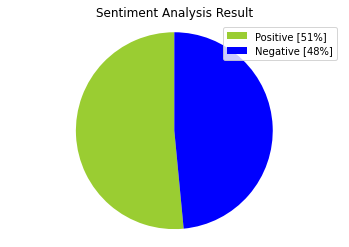

In [52]:
import matplotlib.pyplot as plt

positive = int(100*len(positive_list)/len(tweet_list))
negative = int(100*len(negative_list)/len(tweet_list))

labels = ['Positive ['+str(positive)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, negative]
colors = ['yellowgreen', 'blue']
patches, texts = plt.pie(sizes,colors=colors, startangle=90, radius=50)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

### Visualizing Top Words

The distribution of top unigrams after removing stop words.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [54]:
common_words = get_top_n_words(df['Tweets'], 20)
common_df = pd.DataFrame(common_words, columns = ['Tweets', 'count'])
common_df.head()

,Tweets,count
0,bir,3476
1,olmak,2414
2,ben,2018
3,sen,1530
4,demek,1330


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

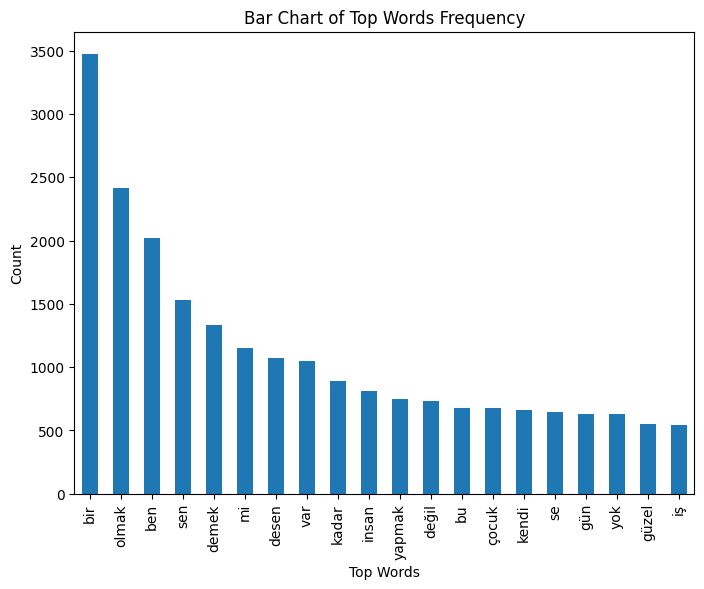

In [55]:
common_df.groupby('Tweets').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency")

### Visualizing N-Grams

### Top Bigrams

In [56]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(df['Tweets'], 30)

In [57]:
top_bigram = pd.DataFrame(common_words2, columns=['Tweets', "Count"])
top_bigram.head()

,Tweets,Count
0,orospu çocuk,211
1,değil mi,101
2,bir desen,87
3,ben desen,87
4,bir insan,80


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

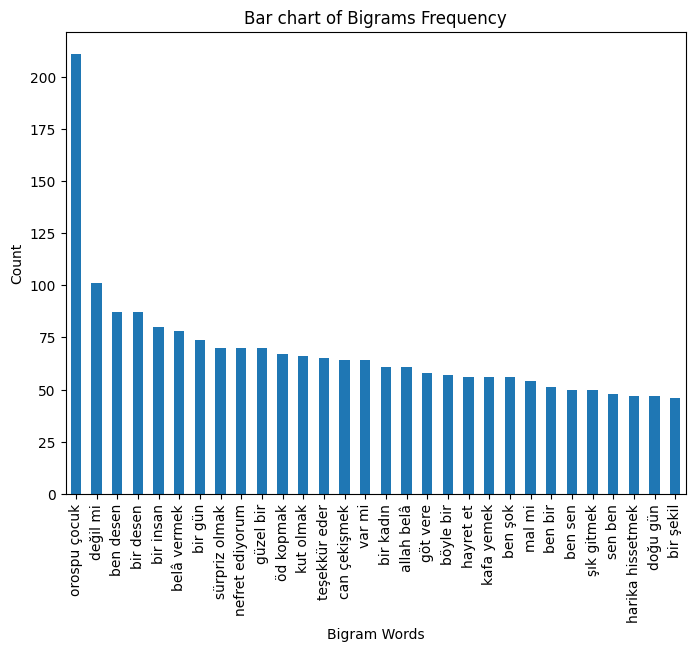

In [58]:
top_bigram.groupby('Tweets').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency")

### Top Trigrams

In [59]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df['Tweets'], 30)
top_trigram = pd.DataFrame(common_words3, columns = ['Tweets' , 'Count'])
top_trigram.head(5)

,Tweets,Count
0,allah belâ vermek,51
1,gün kut olmak,43
2,doğu gün kut,22
3,yok artık inanmak,20
4,allah razı olmak,18


<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

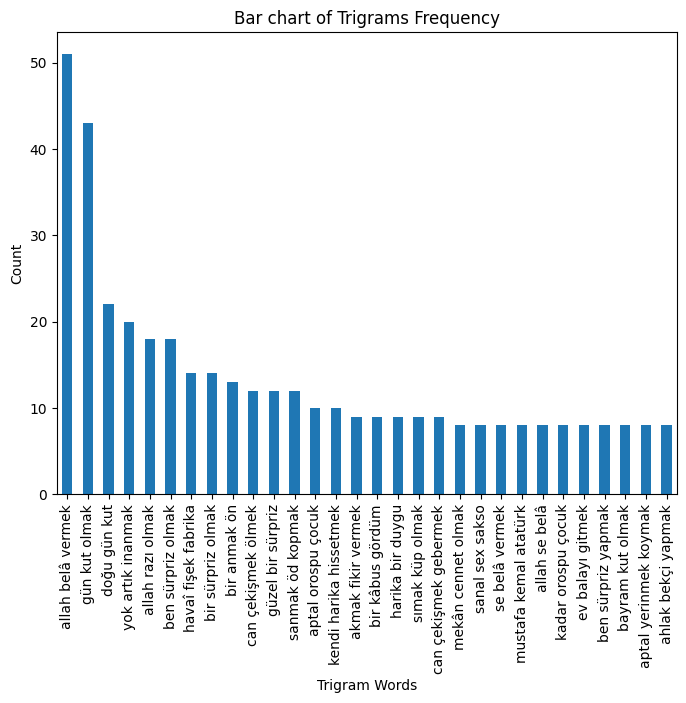

In [60]:
top_trigram.groupby('Tweets').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency")

## WordCloud

In [61]:
from wordcloud import WordCloud, STOPWORDS

def creat_wordcloud(tweets):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in tweets:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    max_words=3000,
                    stopwords = stopwords,
                    min_font_size = 10,
                    repeat = True).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

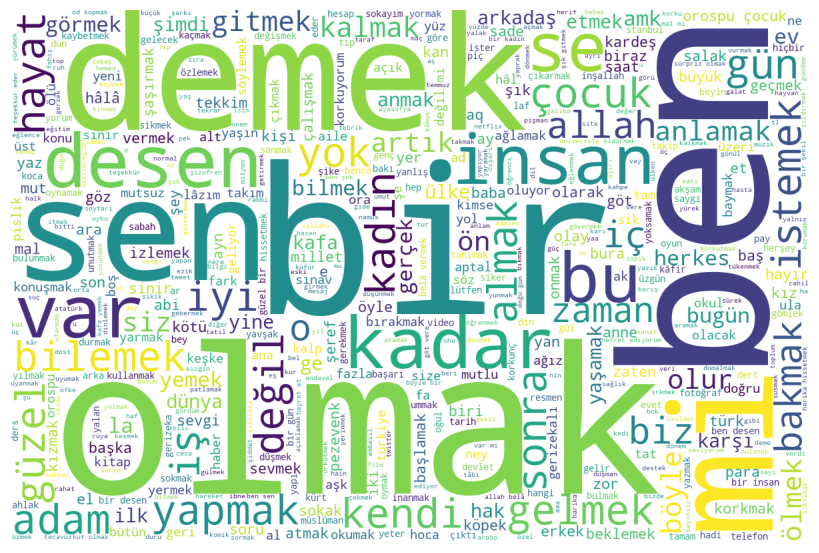

In [62]:
# All Tweets
creat_wordcloud(df['Tweets'].values)

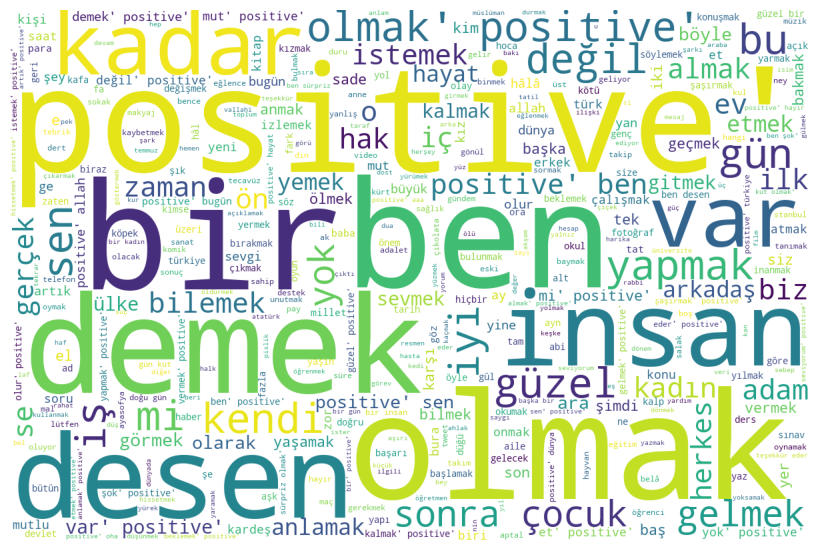

In [63]:
# Positive Tweets
creat_wordcloud(df[df['Sentiment'] == 'Positive'].values)

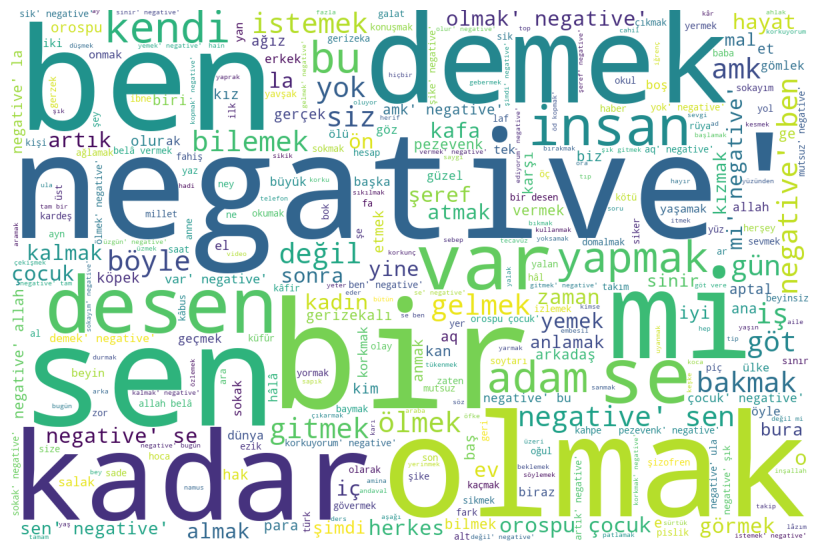

In [64]:
# Negative Tweets
creat_wordcloud(df[df['Sentiment'] == 'Negative'].values)

# Deep Learning Model

## Preparing Data

In [222]:
import collections

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [289]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [290]:
X_train, X_test, y_train, y_test = train_test_split(df.Tweets, df.Sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13599
# Test data samples: 1511


In [291]:
tk = Tokenizer()
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13599 documents
None words in dictionary
Top 5 most common words are: [('bir', 3123), ('olmak', 2166), ('ben', 1814), ('sen', 1383), ('demek', 1203)]


In [292]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

"doğa ağız sıçmak hak var" is converted into [787, 98, 466, 50, 3961, 453, 4886, 50, 1870, 123, 380, 50, 6714, 153, 50]


In [293]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[787, 98, 466, 50, 3961, 453, 4886, 50, 1870, 123, 380, 50, 6714, 153, 50]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 12.0 features with a value of 1.


In [294]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

"Negative" is converted into 1
"1" is converted into [0. 1.]


In [295]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (1360, 10000)


## Deep Learning

### Baseline Model

In [296]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(2, activation='softmax'))
base_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


In [297]:
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [298]:
base_history = deep_model(base_model)

In [299]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

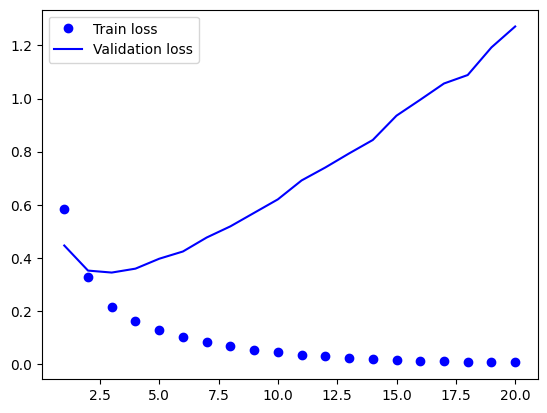

In [300]:
eval_metric(base_history, 'loss')

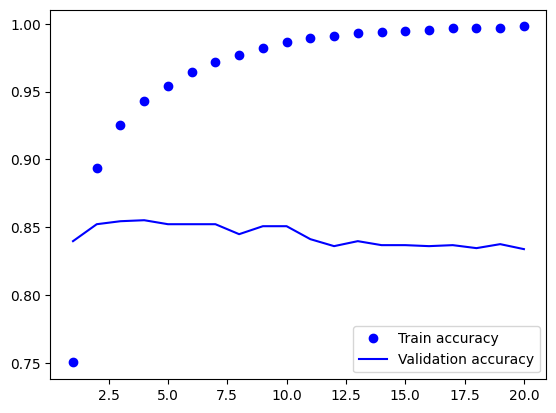

In [301]:
eval_metric(base_history, 'accuracy')

## Handling overfitting

* Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
* Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
* Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

### Reducing network's size

In [302]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(2, activation='softmax'))
reduced_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 66        
Total params: 320,098
Trainable params: 320,098
Non-trainable params: 0
_________________________________________________________________


In [303]:
reduced_history = deep_model(reduced_model)

In [304]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()

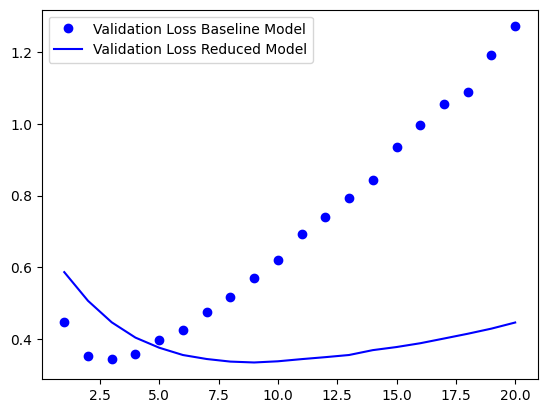

In [305]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')

### Adding regularization

In [306]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(2, activation='softmax'))
reg_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


In [307]:
reg_history = deep_model(reg_model)

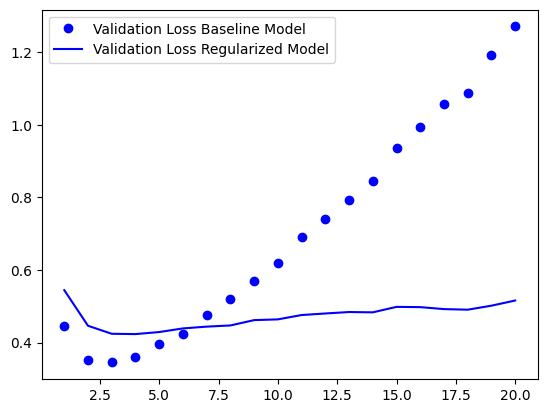

In [308]:
compare_loss_with_baseline(reg_history, 'Regularized Model')

### Adding dropout layers

In [309]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(2, activation='softmax'))
drop_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


In [310]:
drop_history = deep_model(drop_model)

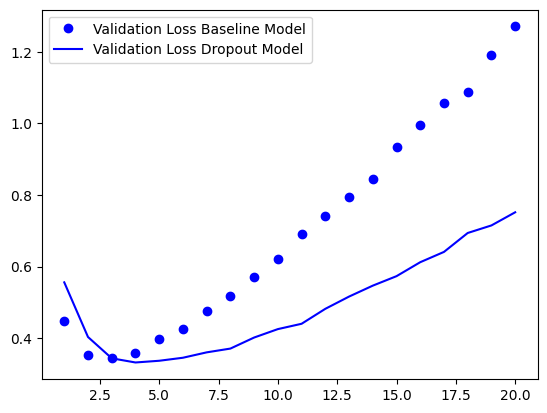

In [311]:
compare_loss_with_baseline(drop_history, 'Dropout Model')

### Training on the full train data and evaluation on test data

In [312]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    
    return results

In [313]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

48/48 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.8438
/n
Test accuracy of baseline model: 84.38%


In [314]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

48/48 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8544
/n
Test accuracy of reduced model: 85.44%


In [315]:
reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

48/48 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8743
/n
Test accuracy of regularized model: 87.43%


In [316]:
drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

48/48 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.8630
/n
Test accuracy of dropout model: 86.30%
